### 1. Chuẩn bị dữ liệu

In [1]:
from tensorflow import keras 
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import seaborn as sns 
import os 
from datetime import datetime

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'



df =pd.read_csv(r"C:\Users\NGUYEN MINH TUYET\Stock pj\clean_stock_data.csv")
print(df.head())
print(df.info())
print(df.describe())

         time symbol   open   high    low  close  volume
0  2020-01-02    A32  17.05  17.05  17.05  17.05   300.0
1  2020-01-03    A32  14.92  14.92  14.92  14.92   500.0
2  2020-01-04    A32  14.92  14.92  14.92  14.92     0.0
3  2020-01-05    A32  14.92  14.92  14.92  14.92     0.0
4  2020-01-06    A32  14.92  14.92  14.92  14.92     0.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3318519 entries, 0 to 3318518
Data columns (total 7 columns):
 #   Column  Dtype  
---  ------  -----  
 0   time    object 
 1   symbol  object 
 2   open    float64
 3   high    float64
 4   low     float64
 5   close   float64
 6   volume  float64
dtypes: float64(5), object(2)
memory usage: 177.2+ MB
None
               open          high           low         close        volume
count  3.318519e+06  3.318519e+06  3.318519e+06  3.318519e+06  3.318519e+06
mean   1.699403e+01  1.719442e+01  1.680896e+01  1.701830e+01  3.405058e+05
std    2.441856e+01  2.465033e+01  2.417042e+01  2.441095e+01  2.19565

In [2]:
symbol = "ACB"

# Lọc dữ liệu theo symbol
data = df[df["symbol"] == symbol].copy()

# Sắp xếp theo time
data = data.sort_values("time")

# Reset index và đặt tên
data = data.reset_index(drop=True)
data.index.name = "index"

data = data.rename(columns={"time": "date", "symbol":"name"})

data.head()

,date,name,open,high,low,close,volume
index,,,,,,,
0,2020-01-02,ACB,6.58,6.64,6.55,6.64,1163109.0
1,2020-01-03,ACB,6.64,6.70,6.61,6.64,1055528.0
2,2020-01-04,ACB,6.64,6.70,6.61,6.64,0.0
3,2020-01-05,ACB,6.64,6.70,6.61,6.64,0.0
4,2020-01-06,ACB,6.64,6.64,6.49,6.49,1286035.0


### 2. Tổng quan dữ liệu

#### 2.1. Mô tả dữ liệu

In [3]:
print(data.head())
print(data.info())
print(data.describe())

             date name  open  high   low  close     volume
index                                                     
0      2020-01-02  ACB  6.58  6.64  6.55   6.64  1163109.0
1      2020-01-03  ACB  6.64  6.70  6.61   6.64  1055528.0
2      2020-01-04  ACB  6.64  6.70  6.61   6.64        0.0
3      2020-01-05  ACB  6.64  6.70  6.61   6.64        0.0
4      2020-01-06  ACB  6.64  6.64  6.49   6.49  1286035.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    2148 non-null   object 
 1   name    2148 non-null   object 
 2   open    2148 non-null   float64
 3   high    2148 non-null   float64
 4   low     2148 non-null   float64
 5   close   2148 non-null   float64
 6   volume  2148 non-null   float64
dtypes: float64(5), object(2)
memory usage: 117.6+ KB
None
              open         high          low        close        volume
count  2148.00000

#### 2.2. Biểu diễn giá mở cửa và đóng cửa

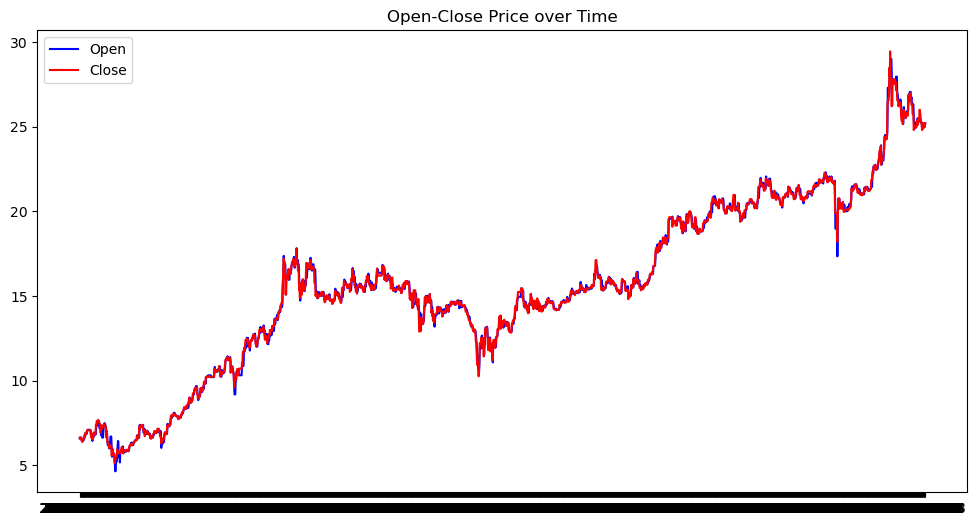

In [4]:
# Initial Data Visualization
# Plot 1 - Open and Close Prices of time
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['open'], label="Open",color="blue")
plt.plot(data['date'], data['close'], label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
plt.show()

#### 2.3. Lưu lượng giao dịch (check ngoại lai)

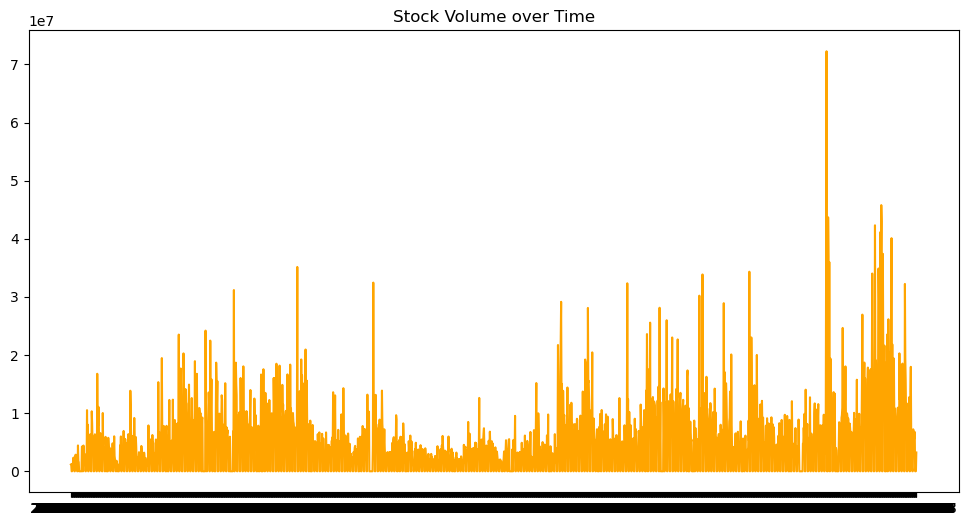

In [5]:
# Plot 2 - Trading Volume (check for outliers)
plt.figure(figsize=(12,6))
plt.plot(data['date'],data['volume'],label="Volume",color="orange")
plt.title("Stock Volume over Time")
plt.show()

In [6]:
#Tính IQR để phát hiện outliers trong volume
q25, q75 = np.percentile(data['volume'], 25), np.percentile(data['volume'], 75)
iqr = q75 - q25
iqr

np.float64(7632973.75)

In [7]:
#Tính giá trị biên để xác định outliers
limit_iqr = 1.5*iqr
lower_iqr, upper_iqr = q25 - limit_iqr, q75 + limit_iqr

In [8]:
#Xác định outliers
ouliers_index_iqr = [x for x in data['volume'] if x < lower_iqr or x > upper_iqr]
print('Number of outliers: %d' % len(ouliers_index_iqr))

Number of outliers: 62


In [9]:
# Loại bỏ outliers
data_new_iqr = data[~data['volume'].isin(ouliers_index_iqr)]
print(f"Number of Non-outliers: {len(data_new_iqr)}")

Number of Non-outliers: 2086


In [10]:
# Drop non-numeric columns
numeric_data = data_new_iqr.select_dtypes(include=["int64","float64"])

#### 2.4. Kiểm tra tính tương quan

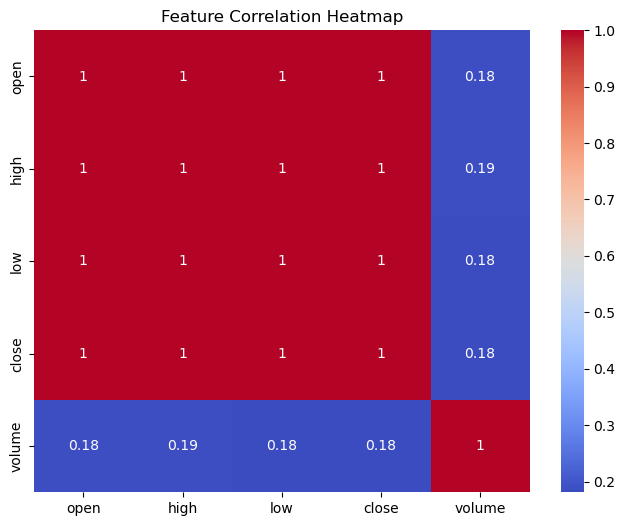

In [11]:
# Plot 3 - Check for correlation between features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

*=> Các biến giá có tương quan mạnh, phù hợp cho dự đoán; volume có thể bổ sung nhưng không chủ đạo.*

#### 2.5. Chuyển định dạng thời gian về datetime

C:\Users\NGUYEN MINH TUYET\AppData\Local\Temp\ipykernel_16636\3323553427.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_new_iqr['date'] = pd.to_datetime(data_new_iqr['date'])


Text(0.5, 1.0, 'Price over time')

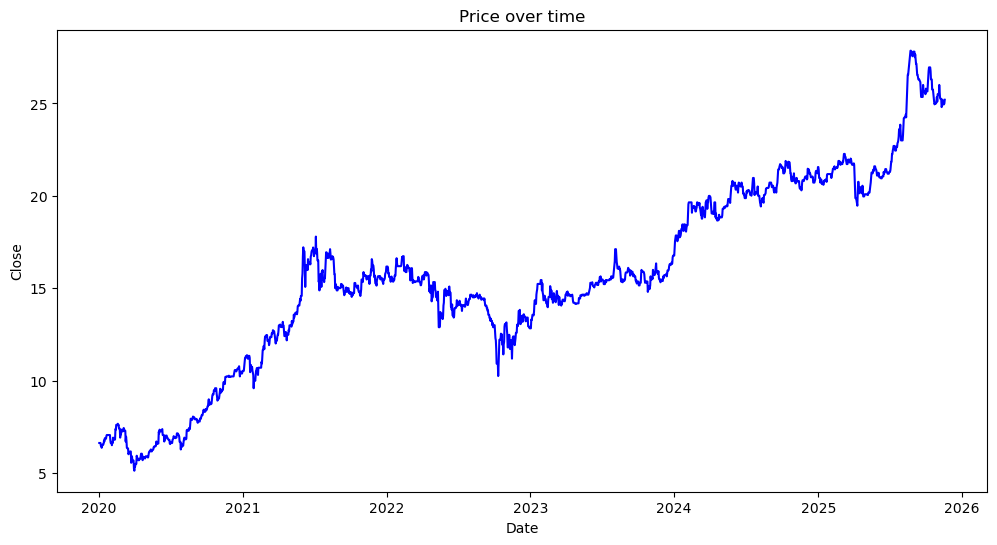

In [12]:
# Convert the Data into Date time then create a date filter
data_new_iqr['date'] = pd.to_datetime(data_new_iqr['date'])

prediction = data_new_iqr.loc[
    (data_new_iqr['date'] > datetime(2020,1,1)) &
    (data_new_iqr['date'] < datetime(2026,1,1))
]

plt.figure(figsize=(12,6))
plt.plot(data_new_iqr['date'], data_new_iqr['close'],color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")

### 3. Chạy mô hình
#### 3.1. Chuẩn bị dữ liệu cho mô hình
**Chuẩn hóa dữ liệu để cải thiện hiệu suất mô hình.**
- scaler = StandardScaler(): Khởi tạo scaler để chuẩn hóa (mean=0, std=1).
- scaled_data = scaler.fit_transform(dataset): Chuẩn hóa toàn bộ dataset.
- training_data = scaled_data[:training_data_len]: Lấy 95% cho train.
- X_train, y_train = [], []: Khởi tạo danh sách cho input (X) và output (y).

Mục đích: Chuẩn hóa giúp mô hình hội tụ nhanh hơn, tránh vấn đề scale giữa các giá trị. 

In [13]:
# Prepare for the LSTM Model (Sequential)
stock_close = data_new_iqr.filter(["close"])
dataset = stock_close.values #convert to numpy array
training_data_len = int(np.ceil(len(dataset) * 0.95))

In [14]:
# Preprocessing Stages
scaler = StandardScaler()
scaled_data = scaler.fit_transform(dataset)

training_data = scaled_data[:training_data_len] #95% of all out data

X_train, y_train = [], []

**Chia chuỗi thành các nhóm dự đoán (sliding window)**

Mỗi input là 60 ngày giá đóng cửa, output là giá ngày tiếp theo.
(60 ngày là window size phổ biến để dự đoán xu hướng ngắn hạn)

In [15]:
# Create a sliding window for stock (60 days)
for i in range(60, len(training_data)):
    X_train.append(training_data[i-60:i, 0])
    y_train.append(training_data[i,0])
    
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

#### 3.2. Xây dựng và huấn luyện mô hình
**Xây dựng mô hình LSTM với Keras**

In [16]:
# Build the Model
model = keras.models.Sequential()

**First Layer: This is like a brain to help the model understand patterns**
- Number 64: the number of memory cells. Higher number, the more complex problems
- return_sequence: after done, give me the full list of ideas for the next layer
- input_shape: tell the first LSTM layer what kind of date expect\
*=> The first LSTM layer learns patterns from past stock prices over time.*

In [17]:
# First Layer
model.add(keras.layers.LSTM(64, return_sequences=True, input_shape=(X_train.shape[1],1)))

c:\Users\NGUYEN MINH TUYET\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Second Layer: This is another brain, but this time it only gives the final idea, not a list of thoughts**
- Number 64: the number of helpers to help the brain. Higher number, the more complex problems
- return_sequence: this tells the model to return a single output (the final prediction) instead of a sequence\
*=> This layer distills the important patterns form the first layer and prepares to make a final prediction.*

In [18]:
# Second Layer
model.add(keras.layers.LSTM(64, return_sequences=False))

**Dense Layer: turns complex patterns into a decision**
- Number 128: this is a regular neutral network layer with 128 neurons to help make the final decision
- activation: helps the model introduce non-linearity (ReLU - Rectified Linear Unit)\
*=> This layer helps the model adjust and refine its understanding of the data, learning more complicated trends.*

In [19]:
# 3rd Layer (Dense)
model.add(keras.layers.Dense(128, activation="relu"))

**Dropout Layout: This layer randomly drops out 50% of the neurons during training**
- Note: This prevents overfitting (when the model memorizes the data too well but struggies with new data).\
*=> It keeps the model from being too sensitive to the training data and makes it perform better*

In [20]:
# 4th Layer (Dropout)
model.add(keras.layers.Dropout(0.5))

**Final Dense Layer: This layer makes the final prediction**
- Note: a simple layer with 1 neuron that outputs one value - the predicted stock price.\
=> This is the layer that actually makes the prediction for the stock price

**Model Compilation: This compiles for the model to tell it how to learn. We are giving it information to improve**
- optimizer: Adam is a popular optimizer that helps the model adjust its learning. Works well with time-series data.
- loss: MAE measures how far the predictions are from the actual prices. The lower the MAE, the better.
- metrics: This is another performance metric that checks how accurate the predictions are.

In [21]:
# Final Output Layer
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

#### 3.3. Kết Quả Huấn Luyện (Training)

In [28]:
training = model.fit(X_train, y_train, epochs=50, batch_size=32)

Epoch 1/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0801 - root_mean_squared_error: 0.1176
Epoch 2/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0855 - root_mean_squared_error: 0.1271
Epoch 3/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0837 - root_mean_squared_error: 0.1236
Epoch 4/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0847 - root_mean_squared_error: 0.1280
Epoch 5/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0837 - root_mean_squared_error: 0.1242
Epoch 6/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0830 - root_mean_squared_error: 0.1260
Epoch 7/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0822 - root_mean_squared_error: 0.1214
Epoch 8/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0854 - root_mean_squared_error: 0.1259
Epoch 9/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0829 - root_mean_squared_error: 0.1227
Epoch 10/50
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0813 - root_mean_squared_error: 0.1228

**Kết luận**
- Model Summary: Số parameters = 58,369, cho thấy mô hình vừa đủ phức tạp mà không quá lớn (tránh overfitting trên dữ liệu cổ phiếu).
- Training History: Với 50 epochs, batch_size=32:
    - Loss (MAE) tăng giảm không đều => không hội tụ.
    - RMSE còn cao => dự đoán chưa chính xác.

#### 3.4. Chuẩn bị dữ liệu test

In [23]:
# Prep the test data
test_data = scaled_data[training_data_len - 60:]
X_test, y_test = [], dataset[training_data_len:]


for i in range(60, len(test_data)):
    X_test.append(test_data[i-60:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1 ))

#### 3.5 Dự đoán

In [24]:
# Make a Prediction
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


**Dự đoán trên test data và inverse transform về scale gốc**
- predictions = model.predict(X_test): Dự đoán giá chuẩn hóa.
- predictions = scaler.inverse_transform(predictions): Chuyển về giá thực tế (VND).

Mục đích: Tạo predictions để so sánh với y_test.

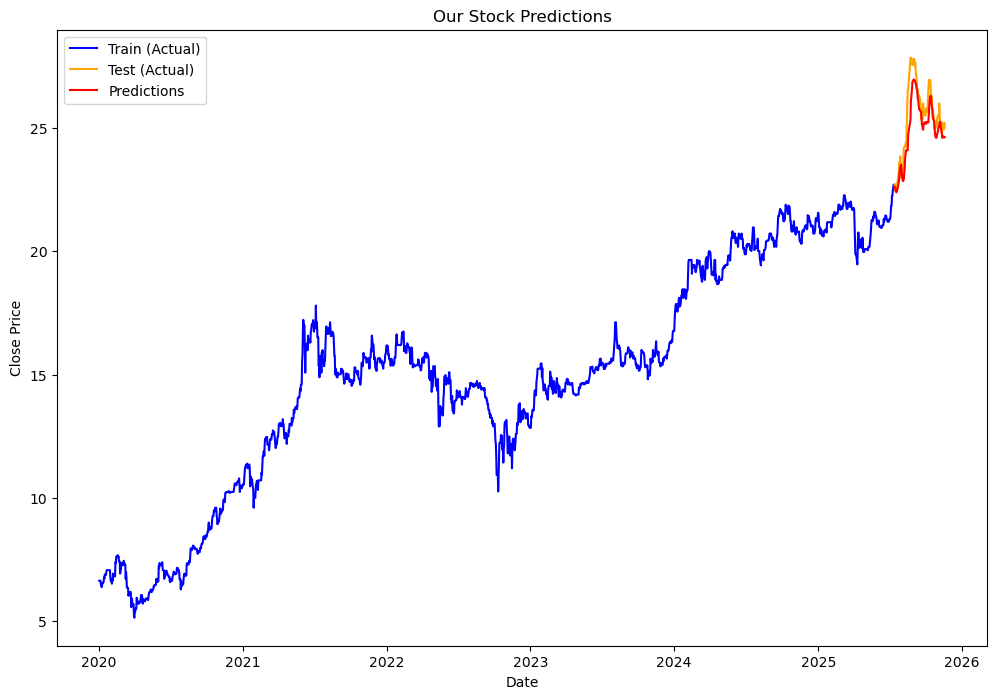

In [26]:
# Plotting data
train = data_new_iqr[:training_data_len]
test =  data_new_iqr[training_data_len:]

test = test.copy()

test['Predictions'] = predictions

plt.figure(figsize=(12,8))
plt.plot(train['date'], train['close'], label="Train (Actual)", color='blue')
plt.plot(test['date'], test['close'], label="Test (Actual)", color='orange')
plt.plot(test['date'], test['Predictions'], label="Predictions", color='red')
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

**=> Dự đoán còn sai lệch.**

**Phương pháp kết hợp phổ biến**
- Ensemble Averaging: Trung bình dự đoán của ARIMA và LSTM (đơn giản, hiệu quả).
- Residual Modeling: Dùng ARIMA dự đoán trend, LSTM dự đoán residuals (phần dư).
- Hybrid Model: ARIMA cho ngắn hạn, LSTM cho dài hạn.

=> Thử phương pháp 2